In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
Bangalor = pd.read_csv("banglore.csv")

In [26]:
Bangalor.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,28/01/2021,IN,Bengaluru,dew,202,8.0,18.0,13.0,58.20
1,24/01/2021,IN,Bengaluru,dew,209,7.5,18.0,12.5,94.21
2,07/01/2021,IN,Bengaluru,dew,180,19.0,22.0,20.0,7.22
3,15/01/2021,IN,Bengaluru,dew,182,16.0,19.0,18.0,6.31
4,22/01/2021,IN,Bengaluru,dew,214,13.0,21.0,18.0,64.83


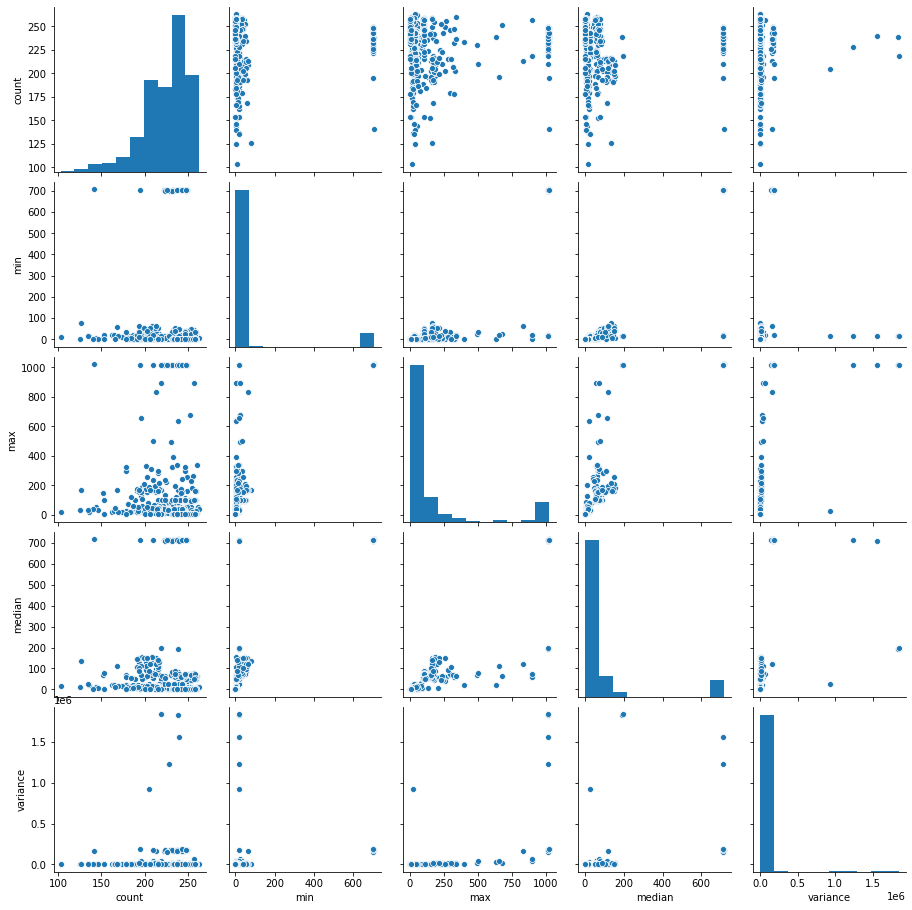

In [72]:
sns.pairplot(Bangalor)

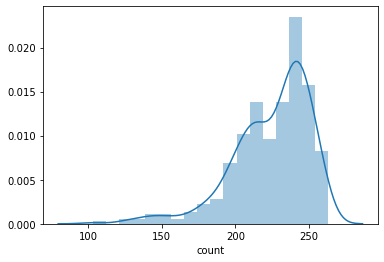

In [75]:
sns.distplot(Bangalor['count'])

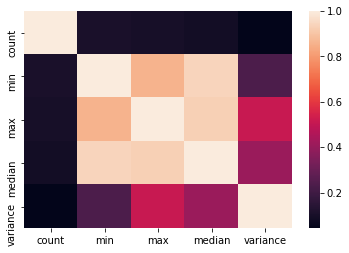

In [76]:
sns.heatmap(Bangalor.corr())

In [83]:
X = Bangalor[['max','min','median','variance']]
y = Bangalor['count']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [86]:
lm = LinearRegression()

In [87]:
lm.fit(X_train,y_train)

LinearRegression()

In [88]:
print(lm.intercept_)

224.81787625649633


In [89]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
max,0.020274
min,0.057138
median,-0.072643
variance,-0.000001


In [90]:
predictions = lm.predict(X_test)

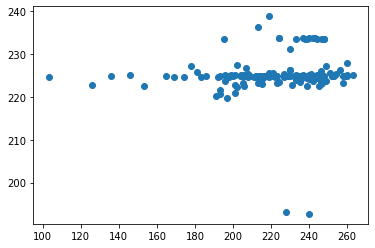

In [91]:
plt.scatter(y_test,predictions)

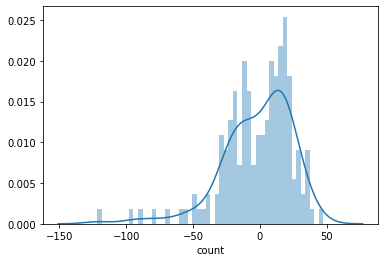

In [62]:
sns.distplot((y_test-predictions),bins=50);

In [63]:
from sklearn import metrics

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20.18776813504
MSE: 701.7274564009358
RMSE: 26.490138852050887
